In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
survey_df = pd.read_csv('survey.csv')


(10 pts) Import and clean the attached CSCI_1070_survey_results.csv about your classmates using Python (pandas). Be sure to:
Standardize the names of places where everyone is from
Standardize the pets in some way (this one will be tricky)
Standardize the favorite food in some way (this one will also be tricky) 
Standardize the majors
Standardize the ages

In [166]:


survey_df.columns = survey_df.columns.str.strip().str.lower()

# survey_df = survey_df[selected_columns].copy()
survey_df.rename(columns={'what state/country were you born in?': 'birthplace',
                          'how many pets and of which kind do you have?': 'pets',
                          'what is your favorite type of food?':'food',
                          'what is your major?':'major',
                          'how old are you?':'age'}, inplace=True)

survey_df.fillna('?', inplace=True)

survey_df['birthplace'] = survey_df['birthplace'].replace({'Saint Louis, Missouri': 'United States', 
                                                                   'United States, Missouri': 'United States', 
                                                                   'Georgia, USA': 'United States',
                                                                   'Missouri/U.S':'United States',
                                                                   'Illinois':'United States',
                                                                   'Missouri':'United States',
                                                                   'New Mexico':'United States',
                                                                   'Minnesota':'United States',
                                                                   'Benghazi, Libya':'Libya'})
survey_df['age'] = survey_df['age'].replace({'19 turning 20 on February 28':'19',
                                                     '18 years old':'18'})
survey_df['pets'] = np.where(survey_df['pets'].str.contains('none'),'0',survey_df['pets'])
survey_df['pets'] = np.where(survey_df['pets'].str.contains('2 cats and 1 dog'),'3',survey_df['pets'])
survey_df['pets'] = np.where(survey_df['pets'].str.contains('No pets'),'0',survey_df['pets'])
survey_df['pets'] = survey_df['pets'].replace({'I have two dogs both chihuahua mixes.':'2',
                                                       "I have two golden retrievers, Ellie and Amber. Ellie is ten years young and everything good about life. Amber is two and scared of everything (foster), but Ellie's teaching her that things���even plastic bags���are okay." : "2",
                                                       'No pets' : '0',
                                                       'We have a Husky named Maverick' : '1',
                                                       '2 miniature daschund dogs' : '2',
                                                       '1 Maincoon' : '1',
                                                       'My french bulldog just passed away a few months ago' : '0',
                                                       "None ):" : "0"})
survey_df['food'] = np.where(survey_df['food'].str.contains('Hot wings'),'American',survey_df['food'])
survey_df['food'] = survey_df['food'].replace({'Pasta but fish is a close second.' : 'Italian',
                                                       'Pasta' : 'Italian',
                                                       'injera' : 'Ethopian',
                                                       'PASTAAAAA' : 'Italian',
                                                       'Kabsa' : 'Arabian',
                                                       'some sort of steak, probably a filet mignon':'Italian',
                                                       'Burgers (blue cheese)' : 'American',
                                                       'grilled chicken' : 'American',
                                                       'pasta' : 'Italian',
                                                       'salmon' : 'Italian',
                                                       "I don't have a favorite" : 'None',
                                                       'mexican/middleastern' : 'Mexican.',
                                                       'Brownies' : 'American',
                                                       'Gambian Food' : 'Gambian',
                                                       'Pizza or Steak' : 'American'})
survey_df['major'] = survey_df['major'].replace({'comp sci' : 'Computer Science',
                                                         'It was pre medicine therefore biology but I decided to switch over to computer science because I did not want to endure the tedious amounts of schooling to be a physician and I find software programming to be cool and the future.':'Computer Science',
                                                         'Criminology and Criminal Justice and I am planing to have a minor in CS': 'Criminology',
                                                         'International Business (Graduated)' : 'International Business',
                                                         'computer science' : 'Computer Science',
                                                         'data science':'Data Science',
                                                         'Computer Sci' : 'Computer Science'})
survey_df.head(20)

,timestamp,what is your name?,birthplace,are you working while in school?,how much experience do you have programming?,what class are you in?,how many siblings do you have?,pets,food,where do you live?,do you take the metro?,major,age,what is your favorite tv show?,what is your favorite video game?,what is your favorite book?,why are you taking this class?,whats your favorite bash command?
0,2024/01/29 6:34:23 PM CST,Gavin Edwards,United States,Yes,6 months - 1 year,Freshman,1,2,Italian,On campus,No,Data Science,18,Breaking Bad,Rocket League,The Scythe series,Its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 PM CST,?,United States,Yes,0-3 months,Freshman,2,0,American,Off campus,No,Nursing,19,Criminal Minds,Valorant,A Little life by Hanya Yanaghara,I have an interest in programming. I enjoy lea...,?
2,2024/01/29 7:45:39 PM CST,Connor Love,United States,No,0-3 months,Freshman,1,2,Mexican.,On campus,No,Economics and Finance.,19,The Wire.,Pok̩mon White 2.,"""Surprised by Joy"" by C. S. Lewis.",Transfer course requirements for the Universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 PM CST,Liam,United States,Yes,0-3 months,Freshman,1,0,Vietnamese,Off campus,No,Biochemistry,18,?,?,?,Applicability,?
4,2024/01/29 10:45:38 PM CST,Aarushi Choudhary,Japan,Yes,0-3 months,Freshman,1,0,Italian,On campus,Yes,Health Sciences,18,?,Spiderman 2,?,I'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 PM CST,Noel Zerai,United States,Yes,0-3 months,Freshman,2,0,Ethopian,On campus,No,Computer Science,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 PM CST,Kine Thiam,United States,Yes,0-3 months,Freshman,5+,0,Italian,On campus,Yes,Computer Science,18,Reign,It takes two,Wonder,At first it was to see if I�۪d like computer s...,?
7,2024/01/30 5:24:37 PM CST,Bandar Aldhahri,Saudi Arabia,Yes,0-3 months,Junior,5+,0,Kabsa,Off campus,No,Criminology,?,Breaking Bad,FIFA - Soccer,?,I am planing to get a master degree in CyberSe...,until now is pwd
8,2024/01/31 10:44:53 AM CST,Aida Bah,United States,Yes,0-3 months,Freshman,2,0,Gambian,On campus,Yes,Computer Science,18,?,?,Dead End Memories - Banana Yoshimoto,"For my major, to learn python",tree
9,2024/01/31 6:34:07 PM CST,Kevin Patel,India,No,0-3 months,Senior,0,?,Italian,Off campus,No,Finance,21,Peaky Blinders,Warzone,The Great Gatsby,To learn the basics of python to help me stand...,'cd'


(15 pts) Create 5 matplotlib or pandas visuals that represent the data. You must use at least 3 different types of visuals (pie chart, scatter plot, histogram, etc) and use proper labeling of axis and data. Write a sentence about what each visual shows about the students in the class.

Text(0.5, 1.0, 'Frequency of Age')

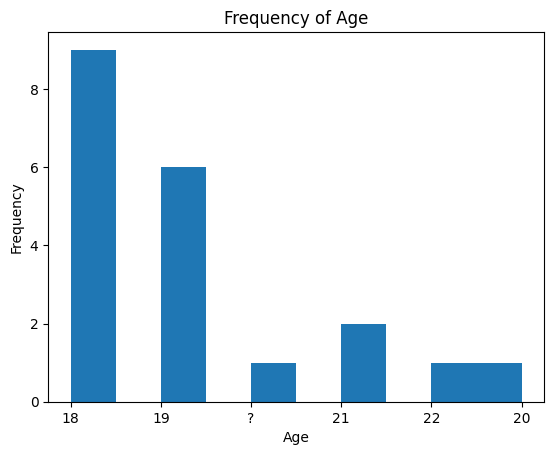

In [167]:
plt.hist(survey_df['age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Age")


Extra credit (3 pts): Format your code so that all of it is in functions and uses default parameters in at least 2 places. 

Text(0, 0.5, '')

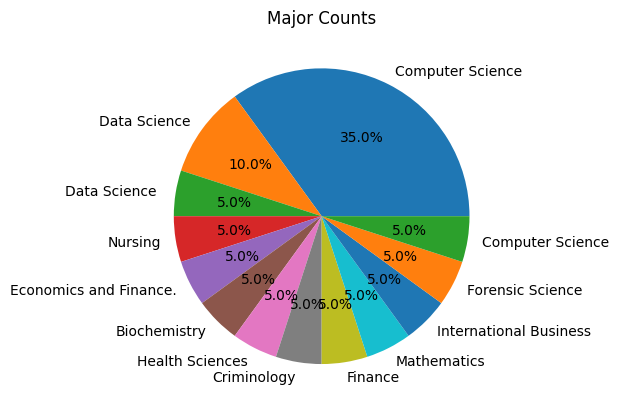

In [168]:
survey_df["major"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Major Counts')
plt.ylabel('')

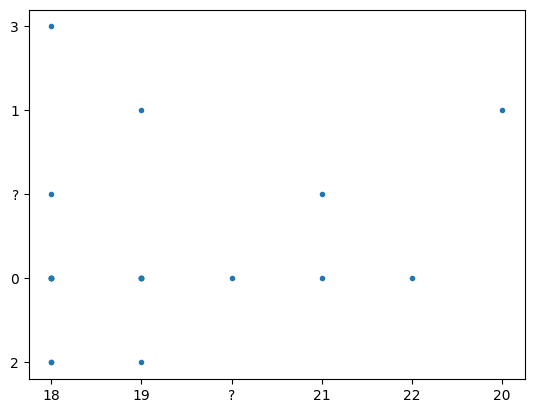

In [169]:
plt.plot(survey_df['age'],survey_df['pets'],'.')

Text(0.5, 1.0, 'Frequency of Birthplace')

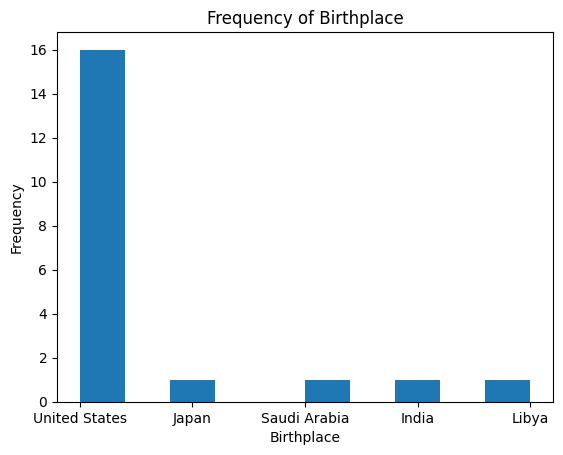

In [172]:
plt.hist(survey_df['birthplace'])
plt.xlabel("Birthplace")
plt.ylabel("Frequency")
plt.title("Frequency of Birthplace")

Text(0, 0.5, '')

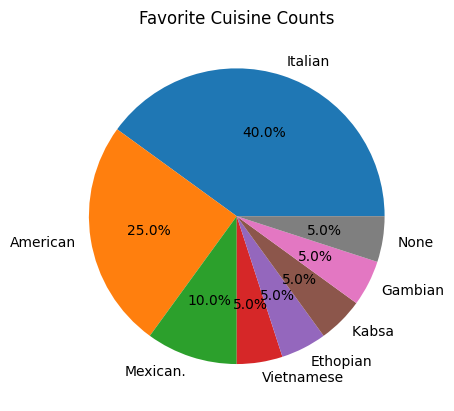

In [171]:
survey_df["food"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Favorite Cuisine Counts')
plt.ylabel('')